In [1]:
#import the required library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#load dataset
temp=pd.read_excel('cluster.xlsx')
temp

,x,y
0,12,39
1,20,39
2,28,30
3,18,52
4,29,54
5,33,46
6,24,55
7,45,59
8,45,63
9,52,70


In [4]:
temp.head(2)

,x,y
0,12,39
1,20,39


In [5]:
df=temp[['x','y']]
print(df.head())
print(df.shape)

    x   y
0  12  39
1  20  39
2  28  30
3  18  52
4  29  54
(19, 2)


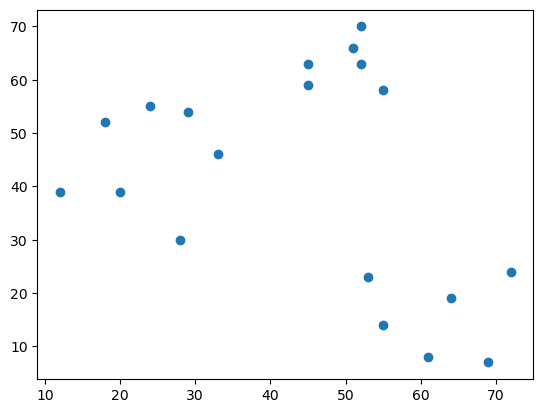

In [6]:
plt.scatter(df['x'],df['y'])

# Step1 : Select random points as centroids

In [7]:
#k=3

np.random.seed(200)
k=3
centroids={i+1:[np.random.randint(0,80),
                np.random.randint(0,80)] for i in range(k)}
print(centroids)
print(type(centroids))

{1: [26, 16], 2: [68, 42], 3: [55, 76]}
<class 'dict'>


26 16 <class 'dict'>
68 42 <class 'dict'>
55 76 <class 'dict'>


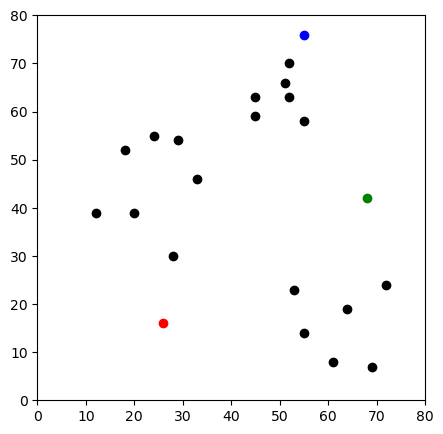

In [10]:
#plot the datapoints
fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color='k')
colmap={1:'r',2:'g',3:'b'}

#plot the centroids

for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
    print(*centroids[i],type(centroids))
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

# Step2: compute distance and assign the datapoint to the closest centroid

In [30]:
def assignment(df,centroids):
    for i in centroids.keys():
        df['distance_from_{}'.format(i)]=(np.sqrt((df['x']-centroids[i][0])**2)+
                                                   (df['y']-centroids[i][1]**2))
    centroid_distance_cols=['distance_from_{}'.format(i) for i in centroids.keys()]
        
    df['closest']=df.loc[:,centroid_distance_cols].idxmin(axis=1)
    df['closest']=df['closest'].map(lambda x: int(x.lstrip('distance_from_')))
    df['color']=df['closest'].map(lambda x: colmap[x])
    print(centroid_distance_cols)
    return df

df=assignment(df,centroids)
df

['distance_from_1', 'distance_from_2', 'distance_from_3']


,x,y,distance_from_1,distance_from_2,distance_from_3,closest,color
0,12,39,-203.0,-1669.0,-5694.0,3,b
1,20,39,-211.0,-1677.0,-5702.0,3,b
2,28,30,-224.0,-1694.0,-5719.0,3,b
3,18,52,-196.0,-1662.0,-5687.0,3,b
4,29,54,-199.0,-1671.0,-5696.0,3,b
5,33,46,-203.0,-1683.0,-5708.0,3,b
6,24,55,-199.0,-1665.0,-5690.0,3,b
7,45,59,-178.0,-1682.0,-5707.0,3,b
8,45,63,-174.0,-1678.0,-5703.0,3,b
9,52,70,-160.0,-1678.0,-5703.0,3,b


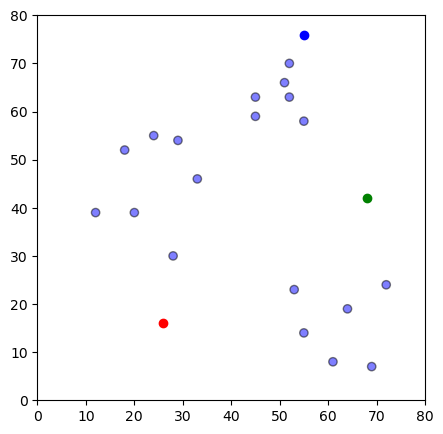

In [33]:
#plot the datapoints
fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()

# Step3: Update the centroids to avoid miss-grouped data points

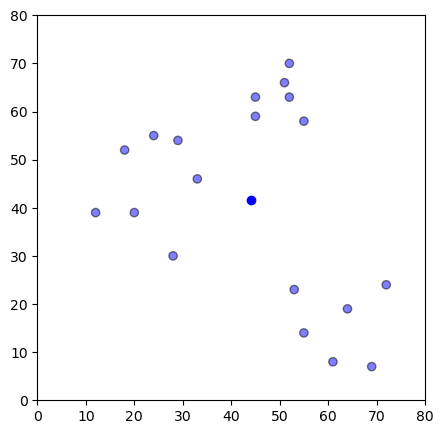

In [35]:
import copy
old_centroids=copy.deepcopy(centroids)

def update(k):
    for i in centroids.keys():
        centroids[i][0]=np.mean(df[df['closest']==i]['x'])
        centroids[i][1]=np.mean(df[df['closest']==i]['y'])
    return k
centroids=update(centroids)

#plot the datapoints
fig=plt.figure(figsize=(5,5))
plt.scatter(df['x'],df['y'],color=df['color'],alpha=0.5,edgecolor='k')
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.xlim(0,80)
plt.ylim(0,80)
plt.show()
        

In [ ]:
ax=plt.axes()
for i in old_centroids.keys():
    old_x=old_centroids[i][0]
    old_y=old_centroids[i][1]
    
    dx=(centroids[i][0]-old_centroids[i][0])*0.75
    dy=(centroids[i][1]-old_centroids[i][1])*0.75
    ax.arrow(old_x,old_y,dx,dy,head_width=2,head_length=3,fc=colmap[i],ec=